In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image 
import pydotplus
from sklearn.externals.six import StringIO

C:\Users\UNION\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [32]:
a = pd.read_csv('attachment_cc_default.csv')
a.head()

,income,credit_score,salaried,defaulted
0,30000,8,Yes,No
1,25000,6,Yes,Yes
2,55000,7,Yes,No
3,45000,6,Yes,No
4,40000,6,No,Yes


In [15]:
a.salaried.replace('No',0,inplace=True)
a.salaried.replace('Yes',1,inplace=True)

In [16]:
a.head()

,income,credit_score,salaried,defaulted
0,30000,8,1,No
1,25000,6,1,Yes
2,55000,7,1,No
3,45000,6,1,No
4,40000,6,0,Yes


In [17]:
X = a.loc[:,['income','credit_score','salaried']]
y = a.loc[:,'defaulted']

In [18]:
model=DecisionTreeClassifier(max_depth=3)
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
node= StringIO()
export_graphviz(model,out_file=node,filled=True,rounded=True,
                feature_names=['income','credit_score','salaried'],
                class_names =['not defaulted','defaulted'])

In [20]:
node.getvalue()
graph= pydotplus.graph_from_dot_data(node.getvalue())

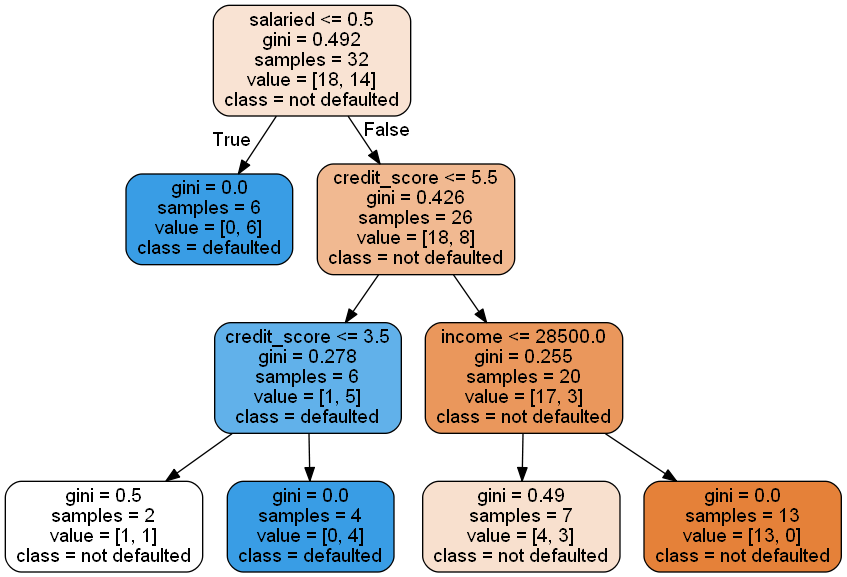

In [21]:
Image(graph.create_png())

In [30]:
model.predict([[39000,6,1]])

array(['No'], dtype=object)